In [141]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Configure plotting
%matplotlib inline
sns.set(style='whitegrid')

In [310]:
# Load dataset from the provided URL or local file
# Replace 'path_to_your_file.csv' with the actual path or URL of your dataset
df = pd.read_csv('data/welddb_data.csv')

# Display the first few rows
df.head()

,Carbon concentration / weight %,Silicon concentration / weight %,Manganese concentration / weight %,Sulphur concentration / weight %,Phosphorus concentration / weight %,Nickel concentration / weight %,Chromium concentration / weight %,Molybdenum concentration / weight %,Vanadium concentration / weight %,Copper concentration / weight %,Cobalt concentration / weight %,Tungsten concentration / weight %,Oxygen concentration / parts per million by weight,Titanium concentration / parts per million by weight,Nitrogen concentration / parts per million by weight,Aluminium concentration / parts per million by weight,Boron concentration / parts per million by weight,Niobium concentration / parts per million by weight,Tin concentration / parts per million by weight,Arsenic concentration / parts per million by weight,Antimony concentration / parts per million by weight,Current / A,Voltage / V,AC or DC,Electrode positive or negative,Heat input / kJ mm^{-1},Interpass temperature,Type of weld,Post weld heat treatment temperature,Post weld heat treatment time / hours,Yield strength / MPa,Ultimate tensile strength / MPa,Elongation / %,Reduction of Area / %,Charpy temperature,Charpy impact toughness / J,Hardness / kg mm^{-2},50% FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggregate / %,Weld ID
0,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,21.0,DC,+,1.0,200,MMA,250.0,14.0,392.0,466.0,31.9,80.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aaw
1,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,21.0,DC,+,1.0,200,MMA,0.0,0.0,NaN,NaN,NaN,NaN,-28.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aawch
2,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,21.0,DC,+,1.0,200,MMA,580.0,2.0,370.0,456.0,35.2,80.6,-38.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aht
3,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,21.0,DC,+,1.0,200,MMA,250.0,14.0,413.0,498.0,31.2,80.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Baw
4,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,21.0,DC,+,1.0,200,MMA,0.0,0.0,NaN,NaN,NaN,NaN,-48.0,100.0,NaN,NaN,32,28.0,40.0,0.0,0.0,Evans-Ni/CMn-1990/1991-0Bawch


In [311]:
# Get information about data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Carbon concentration / weight %                        1652 non-null   float64
 1   Silicon concentration / weight %                       1652 non-null   float64
 2   Manganese concentration / weight %                     1652 non-null   float64
 3   Sulphur concentration / weight %                       1648 non-null   object 
 4   Phosphorus concentration / weight %                    1642 non-null   float64
 5   Nickel concentration / weight %                        697 non-null    float64
 6   Chromium concentration / weight %                      784 non-null    float64
 7   Molybdenum concentration / weight %                    793 non-null    object 
 8   Vanadium concentration / weight %               

In [312]:
# In all non-numeric columns, print all values that can not be converted to numeric
for column in df.columns:
    if df[column].dtype == 'object':
        print(column)
        for value in df[column].unique():
            try:
                float(value)
            except ValueError:
                print(value, ":", round(100*df[column].value_counts()[value]/len(df), 2), "%")
        print()

Sulphur concentration / weight %
<0.002 : 0.42 %

Molybdenum concentration / weight %
<0.01 : 0.12 %

Vanadium concentration / weight %
<0.0005 : 16.1 %
<0.01 : 1.88 %
<0.005 : 0.12 %
<5 : 0.54 %

Copper concentration / weight %
<0.01 : 0.85 %

Cobalt concentration / weight %
<0.01 : 1.27 %

Tungsten concentration / weight %
<0.1 : 0.73 %

Titanium concentration / parts per million by weight
<5 : 0.12 %
<100 : 3.03 %
<0.01 : 0.97 %
<10 : 0.12 %

Nitrogen concentration / parts per million by weight
67tot33res : 0.42 %
66totndres : 0.67 %
61tot34res : 0.42 %
54totndres : 0.36 %
54tot24res : 0.42 %
52tot18res : 0.42 %
50tot17res : 0.42 %
48tot18res : 0.42 %

Aluminium concentration / parts per million by weight
<5 : 20.76 %
<50 : 0.36 %
<100 : 2.3 %
<0.01 : 0.97 %

Boron concentration / parts per million by weight
<5 : 23.91 %
<10 : 1.45 %

Niobium concentration / parts per million by weight
<5 : 17.19 %
<6 : 0.18 %
<100 : 0.54 %
<50 : 0.18 %

Tin concentration / parts per million by weig

In [313]:
# In columns with "<X" or ">X" values, replace them with the value of X. Try to convert the column to numeric type.
columns_to_convert = ["Sulphur concentration / weight %",
                      "Molybdenum concentration / weight %",
                      "Vanadium concentration / weight %",
                      "Copper concentration / weight %",
                      "Cobalt concentration / weight %",
                      "Tungsten concentration / weight %",
                      "Titanium concentration / parts per million by weight",
                      "Nitrogen concentration / parts per million by weight",
                      "Aluminium concentration / parts per million by weight",
                      "Boron concentration / parts per million by weight",
                      "Niobium concentration / parts per million by weight",
                      "Tin concentration / parts per million by weight",
                      "Arsenic concentration / parts per million by weight",
                      "Antimony concentration / parts per million by weight"
                      ]

# Remove columns that are not in the dataset from the list of columns to convert
columns_missing = [column for column in columns_to_convert if column not in df.columns]
columns_to_convert = [column for column in columns_to_convert if column in df.columns]
print("Columns missing from the dataset:", columns_missing)

df[columns_to_convert] = df[columns_to_convert].replace({'<': '', '>': ''}, regex=True)

# In the 'Hardness / kg mm^{-2}' column, keep characters up to the first non-numeric character, and convert the column to numeric type.
df['Hardness / kg mm^{-2}'] = df['Hardness / kg mm^{-2}'].str.extract('(\d+)', expand=False)
df['Hardness / kg mm^{-2}'] = pd.to_numeric(df['Hardness / kg mm^{-2}'], errors='coerce')

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

df.info()

Columns missing from the dataset: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Carbon concentration / weight %                        1652 non-null   float64
 1   Silicon concentration / weight %                       1652 non-null   float64
 2   Manganese concentration / weight %                     1652 non-null   float64
 3   Sulphur concentration / weight %                       1648 non-null   float64
 4   Phosphorus concentration / weight %                    1642 non-null   float64
 5   Nickel concentration / weight %                        697 non-null    float64
 6   Chromium concentration / weight %                      784 non-null    float64
 7   Molybdenum concentration / weight %                    793 non-null    float64
 8   Vanadium co

In [314]:
# Get descriptive statistics for numerical columns
df.describe()

,Carbon concentration / weight %,Silicon concentration / weight %,Manganese concentration / weight %,Sulphur concentration / weight %,Phosphorus concentration / weight %,Nickel concentration / weight %,Chromium concentration / weight %,Molybdenum concentration / weight %,Vanadium concentration / weight %,Copper concentration / weight %,Cobalt concentration / weight %,Tungsten concentration / weight %,Oxygen concentration / parts per million by weight,Titanium concentration / parts per million by weight,Nitrogen concentration / parts per million by weight,Aluminium concentration / parts per million by weight,Boron concentration / parts per million by weight,Niobium concentration / parts per million by weight,Tin concentration / parts per million by weight,Arsenic concentration / parts per million by weight,Antimony concentration / parts per million by weight,Current / A,Voltage / V,Heat input / kJ mm^{-1},Post weld heat treatment temperature,Post weld heat treatment time / hours,Yield strength / MPa,Ultimate tensile strength / MPa,Elongation / %,Reduction of Area / %,Charpy temperature,Charpy impact toughness / J,Hardness / kg mm^{-2},50% FATT,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggregate / %
count,1652.000000,1652.000000,1652.000000,1648.000000,1642.000000,697.000000,784.000000,793.000000,928.000000,578.000000,129.000000,75.000000,1256.000000,935.000000,1183.000000,905.000000,504.000000,752.000000,296.000000,234.000000,260.000000,1404.000000,1404.000000,1652.000000,1639.000000,1639.000000,780.000000,738.000000,700.000000,705.000000,879.000000,879.00000,138.000000,31.000000,90.000000,90.000000,89.000000,89.000000
mean,0.075521,0.328577,1.202821,0.009529,0.012952,0.415034,2.101273,0.479172,0.097379,0.172163,0.071023,0.134267,441.967357,80.564342,113.378698,102.347227,7.878968,134.035904,42.170986,31.044726,29.456077,283.843661,27.607379,1.700987,304.674192,5.049652,508.557179,594.386314,26.275714,71.799858,-34.606371,87.68942,226.905797,-31.096774,25.955556,52.833333,0.337079,0.438202
std,0.023898,0.112455,0.382137,0.011226,0.019627,0.786951,3.026548,0.477404,0.492889,0.322933,0.353735,0.454958,147.483825,97.086353,95.902889,141.474043,9.542165,228.686640,89.075058,43.003026,36.782796,192.560955,12.555629,1.298465,285.498003,6.096034,92.865446,88.636238,4.895986,8.926551,34.738624,50.11670,57.748370,43.644285,21.283486,23.483798,3.179994,1.397685
min,0.029000,0.040000,0.270000,0.001000,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,132.000000,0.000000,21.000000,0.004000,1.000000,0.000000,0.000000,0.003000,0.000000,115.000000,11.500000,0.600000,0.000000,0.000000,315.000000,447.000000,10.600000,17.000000,-114.000000,3.00000,143.000000,-126.000000,3.000000,0.000000,0.000000,0.000000
25%,0.061750,0.270000,0.940000,0.006000,0.007000,0.000000,0.000000,0.000000,0.000500,0.000000,0.000000,0.000000,370.000000,30.000000,72.000000,5.000000,5.000000,5.000000,0.008000,0.030500,0.008000,170.000000,21.000000,1.000000,0.000000,0.000000,443.000000,532.775000,22.800000,68.000000,-60.000000,38.00000,194.500000,-62.000000,9.000000,35.500000,0.000000,0.000000
50%,0.074000,0.320000,1.270000,0.007000,0.010000,0.067000,0.530000,0.340000,0.009500,0.030000,0.005000,0.000000,423.000000,42.000000,83.000000,44.000000,5.000000,5.000000,40.000000,10.000000,15.000000,170.000000,21.000000,1.000000,250.000000,2.000000,495.000000,575.500000,26.800000,75.000000,-40.000000,100.00000,224.000000,-15.000000,18.000000,60.000000,0.000000,0.000000
75%,0.086000,0.360000,1.440000,0.010000,0.014000,0.260000,2.300000,1.010000,0.044000,0.180000,0.010000,0.000000,471.000000,100.000000,106.500000,150.000000,5.000000,200.000000,60.000000,50.000000,50.000000,300.000000,30.000000,2.000000,580.000000,10.000000,559.250000,647.000000,30.000000,78.000000,-17.500000,100.00000,241.000000,5.000000,38.000000,71.750000,0.000000,0.000000
max,0.180000,1.140000,2.250000,0.140000,0.250000,3.500000,10.200000,1.500000,5.

In [315]:
# Display column names to verify units
print("Column Names and Units:")
for col in df.columns:
    print(f"- {col}")

Column Names and Units:
- Carbon concentration / weight %
- Silicon concentration / weight %
- Manganese concentration / weight %
- Sulphur concentration / weight %
- Phosphorus concentration / weight %
- Nickel concentration / weight %
- Chromium concentration / weight %
- Molybdenum concentration / weight %
- Vanadium concentration / weight %
- Copper concentration / weight %
- Cobalt concentration / weight %
- Tungsten concentration / weight %
- Oxygen concentration / parts per million by weight
- Titanium concentration / parts per million by weight
- Nitrogen concentration / parts per million by weight
- Aluminium concentration / parts per million by weight
- Boron concentration / parts per million by weight
- Niobium concentration / parts per million by weight
- Tin concentration / parts per million by weight
- Arsenic concentration / parts per million by weight
- Antimony concentration / parts per million by weight
- Current / A
- Voltage / V
- AC or DC
- Electrode positive or ne

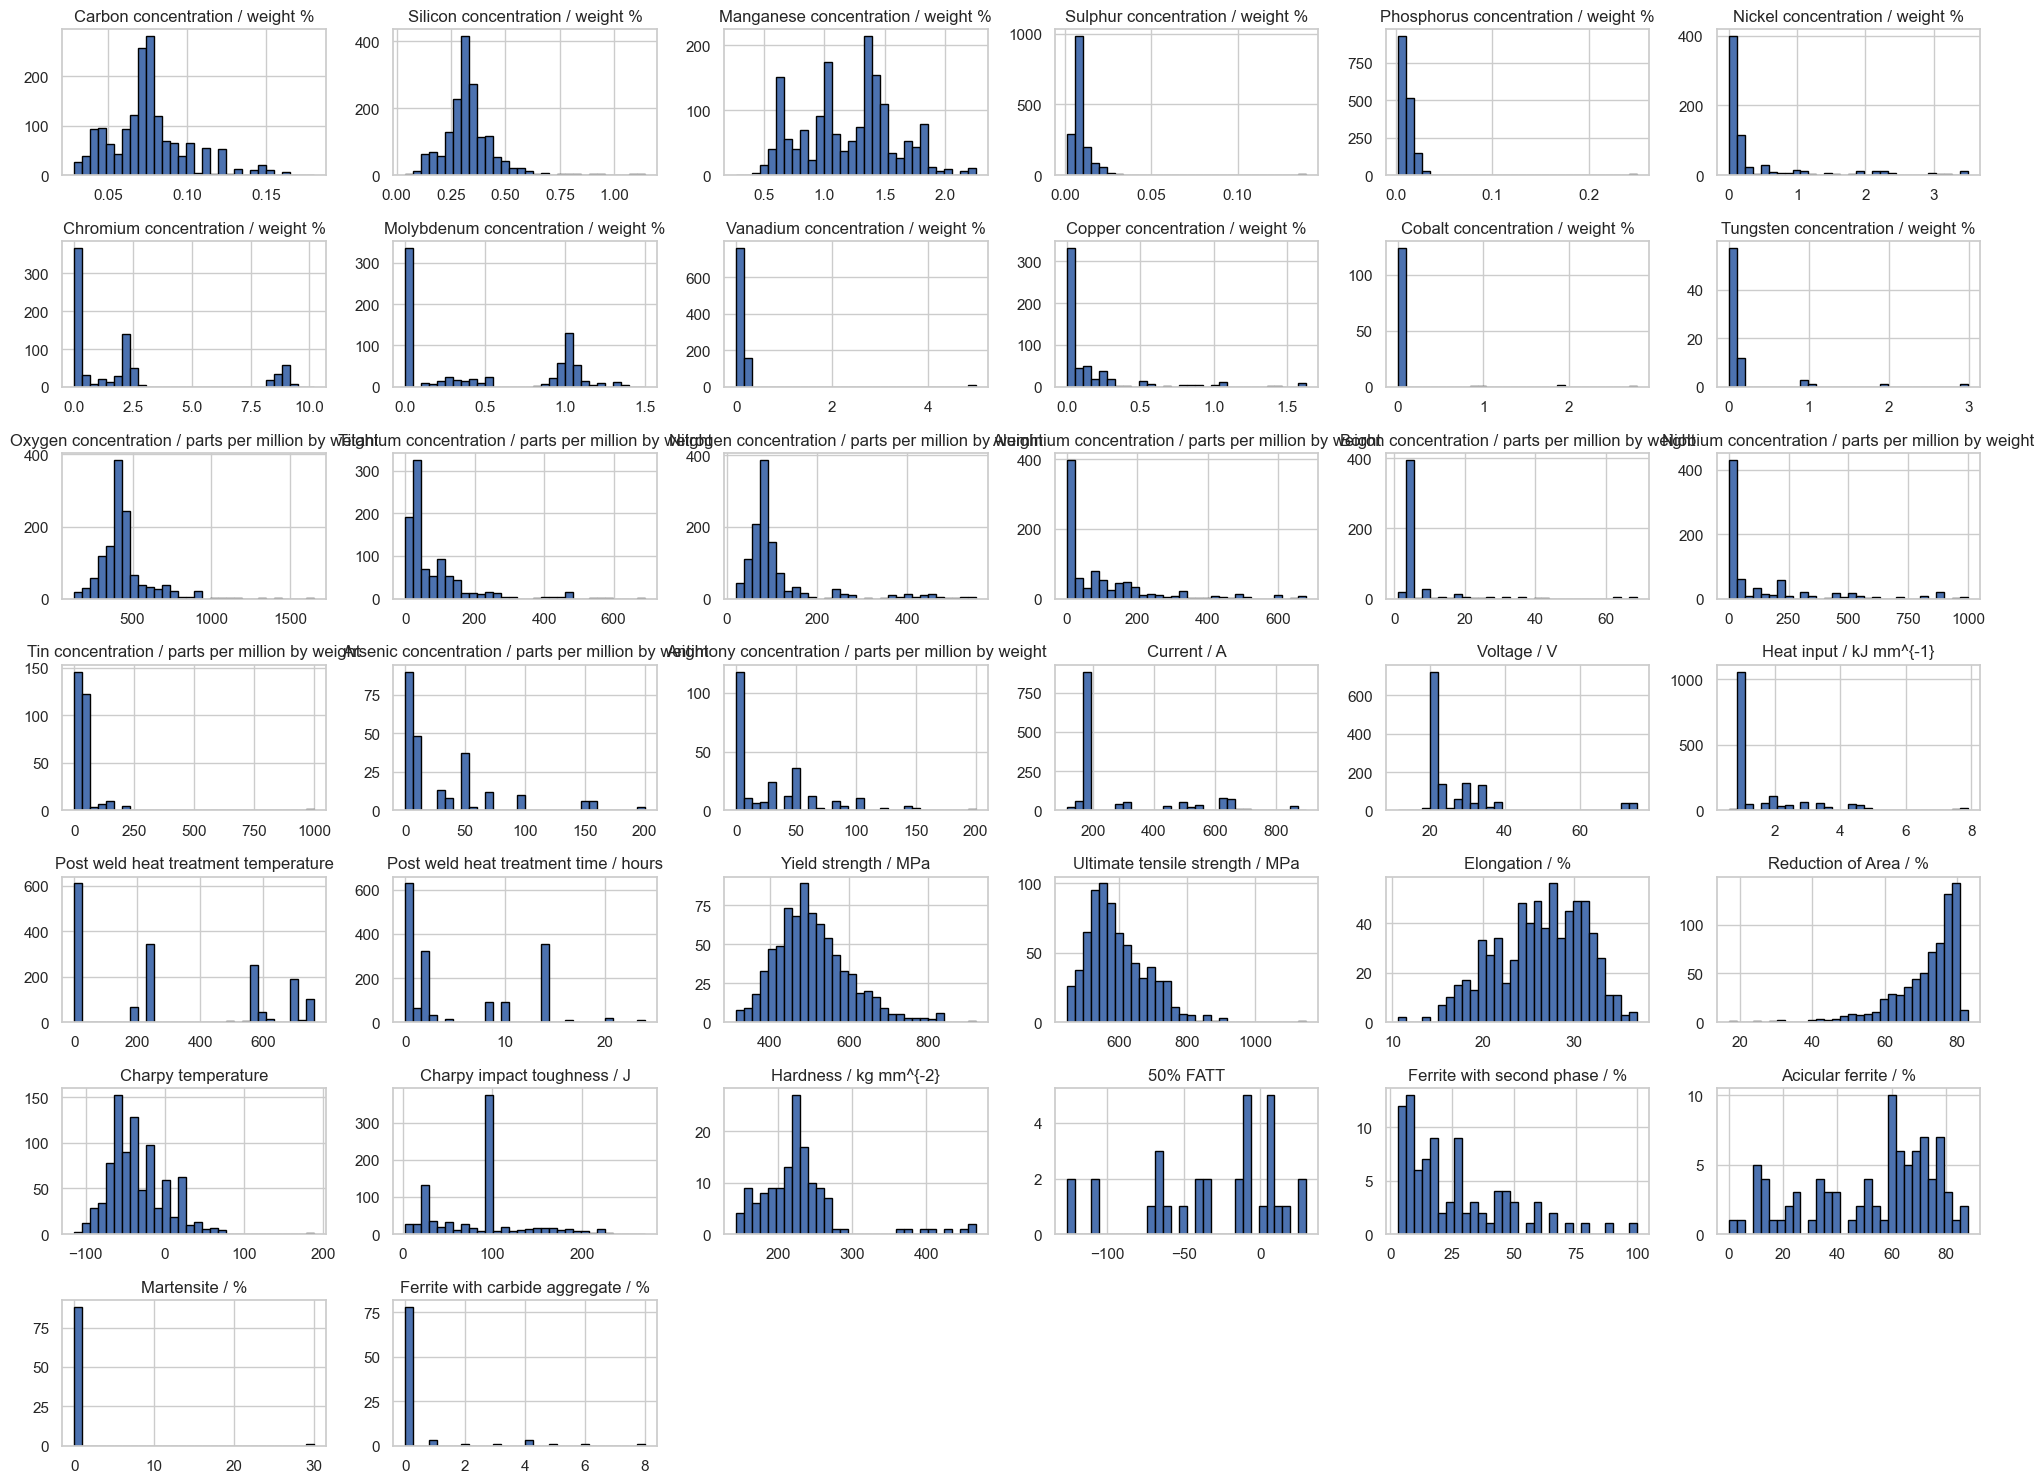

In [316]:
# Plot histograms for numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numerical_cols].hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

# Identifying Variables Representing Weld Quality

## Actions:

- Determine variables indicative of weld quality (e.g., mechanical properties).
- Understand the significance of these variables in the context of welding.
- Analyze correlations between potential target variables and features.

## Strategy Development:
- Select the target variable(s) for prediction.
- Justify the choice based on data availability and relevance.
- Plan the approach to predict weld quality from identified variables.
  

In [317]:
df.columns

Index(['Carbon concentration / weight %', 'Silicon concentration / weight %',
       'Manganese concentration / weight %',
       'Sulphur concentration / weight %',
       'Phosphorus concentration / weight %',
       'Nickel concentration / weight %', 'Chromium concentration / weight %',
       'Molybdenum concentration / weight %',
       'Vanadium concentration / weight %', 'Copper concentration / weight %',
       'Cobalt concentration / weight %', 'Tungsten concentration / weight %',
       'Oxygen concentration / parts per million by weight',
       'Titanium concentration / parts per million by weight',
       'Nitrogen concentration / parts per million by weight',
       'Aluminium concentration / parts per million by weight',
       'Boron concentration / parts per million by weight',
       'Niobium concentration / parts per million by weight',
       'Tin concentration / parts per million by weight',
       'Arsenic concentration / parts per million by weight',
       'Anti

In [318]:
# List potential weld quality variables
potential_targets = [
    'Yield strength / MPa',
    'Ultimate tensile strength / MPa',
    'Elongation / %',
    'Reduction of Area / %',
    'Charpy impact toughness / J',
    '50% FATT',
]

# Check availability and missing values of potential target variables
missing_values_targets = df[potential_targets].isnull().sum()
print("Missing values in potential target variables (out of", len(df), "rows):")
print(missing_values_targets)

Missing values in potential target variables (out of 1652 rows):
Yield strength / MPa                872
Ultimate tensile strength / MPa     914
Elongation / %                      952
Reduction of Area / %               947
Charpy impact toughness / J         773
50% FATT                           1621
dtype: int64


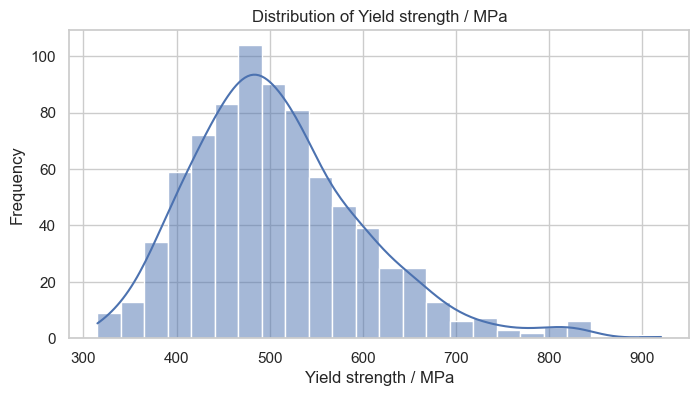

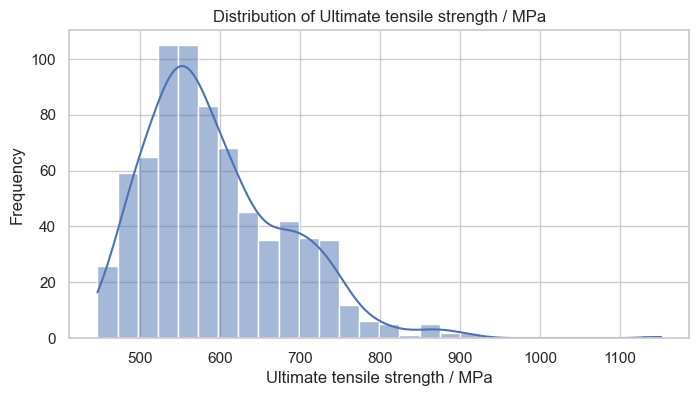

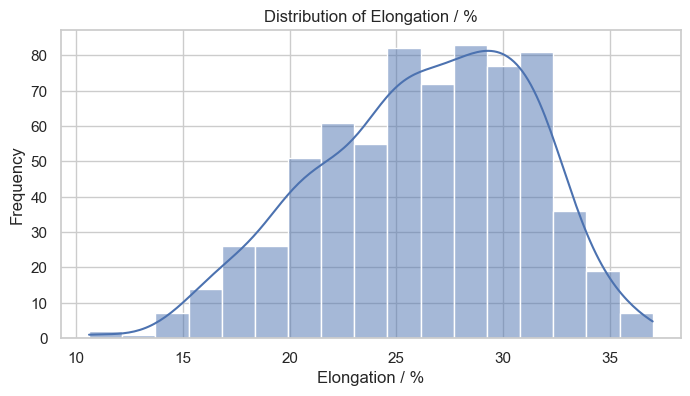

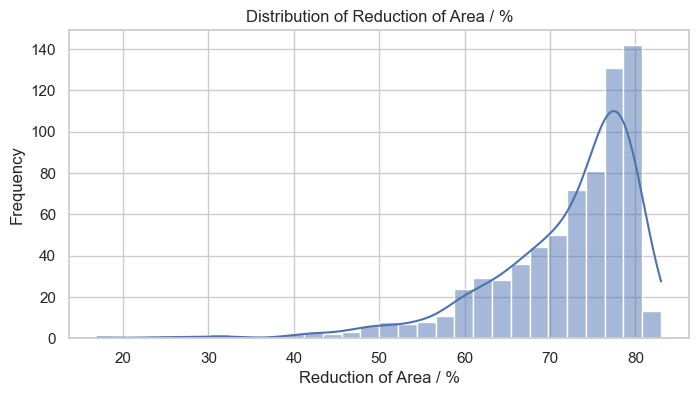

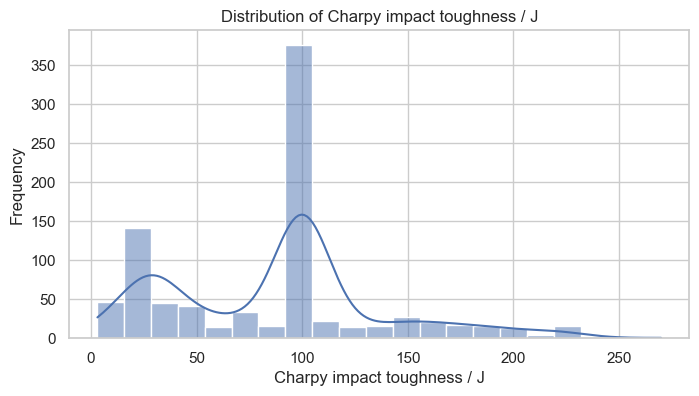

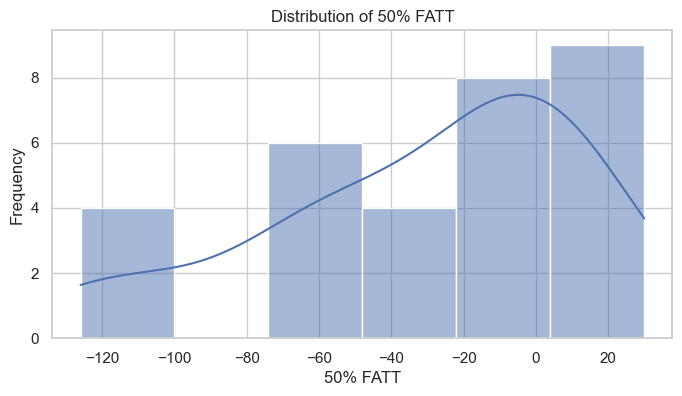

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each potential target variable
for target in potential_targets:
    if target in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[target], kde=True)
        plt.title(f'Distribution of {target}')
        plt.xlabel(target)
        plt.ylabel('Frequency')
        plt.show()


# Understanding the Significance of Potential Target Variables

1. **Yield Strength / MPa**
   - *Definition*: Stress at which a material begins to deform plastically.
   - *Significance*: Indicates the load a weld can withstand before permanent deformation.
   - **Note**: This is measured via destructive testing (tensile tests), meaning it cannot be used directly as a feature in a predictive model for production welds because testing would destroy the weld. Therefore, a model predicting yield strength must rely on non-destructive features.

2. **Ultimate Tensile Strength / MPa**
   - *Definition*: Maximum stress a material can withstand while being stretched or pulled.
   - *Significance*: Reflects the maximum strength of the weld.
   - **Note**: Like yield strength, ultimate tensile strength requires a destructive tensile test. As a result, it cannot be used directly as a feature in production but can be predicted using non-destructive test data.

3. **Elongation / %**
   - *Definition*: Measure of ductility, the ability to deform before fracture.
   - *Significance*: Higher elongation means the weld can absorb more energy before failing.
   - **Note**: Elongation is also derived from a destructive tensile test, making it unsuitable for direct use as a feature in production settings. A predictive model should infer elongation using other non-destructive tests.

4. **Reduction of Area / %**
   - *Definition*: Percentage reduction of cross-sectional area at fracture.
   - *Significance*: Another measure of ductility and toughness.
   - **Note**: Since this is measured via destructive testing (tensile test), it cannot be directly used in a production predictive model but can be predicted using other non-destructive features.

5. **Charpy Impact Toughness / J**
   - *Definition*: Energy absorbed by the material during fracture in an impact test.
   - *Significance*: Indicates the material's ability to withstand sudden impacts, important for brittle fracture prevention.
   - **Note**: This test requires breaking the material, making it destructive. Thus, it cannot be directly measured in production welds. However, predicting Charpy toughness using non-destructive features is important in ensuring weld quality, especially in safety-critical applications.

---

### Reflection on Destructive vs. Non-Destructive Tests:

- **Destructive Tests**: Properties like yield strength, ultimate tensile strength, elongation, reduction of area, Charpy toughness, and 50% FATT are crucial for evaluating weld quality but can only be measured via destructive testing. Since these tests cannot be applied to production welds (as they break the material), these variables **cannot be directly used as features** in a predictive model for production.

- **Non-Destructive Tests**: Hardness, along with other non-destructive evaluation methods (e.g., ultrasonic, radiographic), can be safely measured on production welds. These features are practical to collect during production and can be used as inputs for the predictive model.

### **Conclusion**:

For the model to be useful in evaluating the quality of a weld **without breaking it**, the focus should be on building a predictive model using non-destructive features to infer mechanical properties that typically require destructive testing, such as tensile strength or Charpy impact toughness. By leveraging non-destructive data, we can ensure that the welds remain intact while still making reliable predictions about their quality.


In [320]:
# For each group of row where all features (excepted "Charpy temperature") are equal, replace missing value of "Yield strength / MPa", "Ultimate tensile strength / MPa", "Elongation / %", "Reduction of Area / %"
# with the median of the group.

# We do this because rows with the same group_id correspond to the same setup of experiment, and we don't want to leak information from the test set to the training set.
# We only want to test on unseen data.

import pandas as pd
pd.set_option('display.max_columns', None)

target_variables = potential_targets

# List of target columns where missing values need to be filled
target_columns_to_fill = ["Yield strength / MPa", "Ultimate tensile strength / MPa", "Elongation / %", "Reduction of Area / %"]

# Features to group by (excluding "Charpy temperature")
features_to_remove = ["Charpy temperature", "group_id", "Weld ID", 'Hardness / kg mm^{-2}', '50% FATT']
features_to_group = [feature for feature in df.columns if feature not in features_to_remove + target_variables]

print("Features to group:", features_to_group)

df_grouped = df.copy()

# Add group_id column to the DataFrame (hash of the features to group by)
df_grouped["group_id"] = df_grouped[features_to_group].apply(lambda x: str(hash(str(tuple(x)))), axis=1)

df_grouped = df_grouped.groupby("group_id")

# Function to replace missing values in each group
def fill_missing_values_with_group_median(group):
    # For each target column, replace missing values with the median of the group
    for column in target_columns_to_fill:
        # If empty prevent "mean of empty slice" warning
        if group[column].isnull().all():
            continue

        # Calculate the median for the column in this group
        median_value = group[column].median()
        
        # Replace missing values with the median value (but don't overwrite existing values)
        group.fillna({column: median_value}, inplace=True)
    
    return group

# Apply the function to each group to fill missing values with the median
df_grouped_filled = df_grouped.apply(fill_missing_values_with_group_median)

# Reset the index if needed after grouping
# df_grouped_filled.reset_index(drop=True, inplace=True)

# Average size of groups:
print("Average size of groups:", df_grouped.size().mean())

# Ungroup the DataFrame
df_filled = df_grouped_filled.reset_index(drop=True)
df_filled.to_csv('data/groups.csv', index=True)

df_filled.sort_values(by='group_id').head(15)

Features to group: ['Carbon concentration / weight %', 'Silicon concentration / weight %', 'Manganese concentration / weight %', 'Sulphur concentration / weight %', 'Phosphorus concentration / weight %', 'Nickel concentration / weight %', 'Chromium concentration / weight %', 'Molybdenum concentration / weight %', 'Vanadium concentration / weight %', 'Copper concentration / weight %', 'Cobalt concentration / weight %', 'Tungsten concentration / weight %', 'Oxygen concentration / parts per million by weight', 'Titanium concentration / parts per million by weight', 'Nitrogen concentration / parts per million by weight', 'Aluminium concentration / parts per million by weight', 'Boron concentration / parts per million by weight', 'Niobium concentration / parts per million by weight', 'Tin concentration / parts per million by weight', 'Arsenic concentration / parts per million by weight', 'Antimony concentration / parts per million by weight', 'Current / A', 'Voltage / V', 'AC or DC', 'Elect

/var/folders/_8/vpwl6kq551v_bt6m3llx5n9c0000gn/T/ipykernel_48853/3663680759.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped_filled = df_grouped.apply(fill_missing_values_with_group_median)


,Carbon concentration / weight %,Silicon concentration / weight %,Manganese concentration / weight %,Sulphur concentration / weight %,Phosphorus concentration / weight %,Nickel concentration / weight %,Chromium concentration / weight %,Molybdenum concentration / weight %,Vanadium concentration / weight %,Copper concentration / weight %,Cobalt concentration / weight %,Tungsten concentration / weight %,Oxygen concentration / parts per million by weight,Titanium concentration / parts per million by weight,Nitrogen concentration / parts per million by weight,Aluminium concentration / parts per million by weight,Boron concentration / parts per million by weight,Niobium concentration / parts per million by weight,Tin concentration / parts per million by weight,Arsenic concentration / parts per million by weight,Antimony concentration / parts per million by weight,Current / A,Voltage / V,AC or DC,Electrode positive or negative,Heat input / kJ mm^{-1},Interpass temperature,Type of weld,Post weld heat treatment temperature,Post weld heat treatment time / hours,Yield strength / MPa,Ultimate tensile strength / MPa,Elongation / %,Reduction of Area / %,Charpy temperature,Charpy impact toughness / J,Hardness / kg mm^{-2},50% FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggregate / %,Weld ID,group_id
0,0.043,0.24,1.37,0.008,0.013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DC,+,4.3,200,MMA,0.0,0.0,NaN,NaN,NaN,NaN,-27.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EvHtIp1979-4.3CC,-1015528092471230269
1,0.075,0.25,1.44,0.008,0.008,0.00,0.00,1.07,5.0000,0.00,NaN,NaN,432.0,31.0,83.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,200,MMA,250.0,14.0,650.0,720.0,20.0,70.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EvansLetterC+1Mo,-1027327365938490851
2,0.075,0.25,1.44,0.008,0.008,0.00,0.00,1.07,5.0000,0.00,NaN,NaN,432.0,31.0,83.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,200,MMA,250.0,14.0,650.0,720.0,20.0,70.8,-39.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EvansLetterC+1Moch1,-1027327365938490851
3,0.075,0.25,1.44,0.008,0.008,0.00,0.00,1.07,5.0000,0.00,NaN,NaN,432.0,31.0,83.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,200,MMA,250.0,14.0,650.0,720.0,20.0,70.8,-85.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EvansLetterC+1Moch2,-1027327365938490851
4,0.069,0.51,1.39,0.004,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,379.0,69.0,41.0,480.0,NaN,NaN,NaN,NaN,NaN,170.0,21.0,DC,+,1.0,200,MMA,250.0,14.0,466.0,533.0,27.2,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-AlTi-1994-80/480ht,-1027746569859760420
5,0.079,0.29,1.79,0.006,0.007,NaN,NaN,NaN,0.0004,NaN,NaN,NaN,406.0,33.0,105.0,5.0,5.0,895.0,NaN,NaN,NaN,170.0,21.0,DC,+,1.0,200,MMA,0.0,0.0,NaN,NaN,NaN,NaN,-6.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Nb/Mn-1991-D895awch,-1045200804800205431
6,0.073,0.35,0.64,0.005,0.004,NaN,NaN,NaN,0.0003,NaN,NaN,NaN,428.0,38.0,77.0,5.0,5.0,5.0,NaN,NaN,NaN,170.0,21.0,DC,+,1.0,200,MMA,580.0,2.0,329.0,447.0,36.4,80.5,-54.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-V/Mn-1991-A3ht,-107658779724012004
7,0.073,0.35,0.64,0.005,0.004,NaN,NaN,NaN,0.0003,NaN,NaN,NaN,428.0,38.0,77.0,5.0,5.0,5.0,NaN,NaN,NaN,170.0,21.0,DC,+,1.0,200,MMA,580.0,2.0,329.0,447.0,36.4,80.5,-55.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Nb/Mn-1991-A<5ht,-107658779724012004
9,0.100,0.27,0.60,0.002,0.011,0.13,8.75,1.02,0.2000,0.09,0.017,0.1,NaN,20.0,390.0,160.0,10.0,NaN,30.000,40.000,NaN,400.0,31.5,AC,+,1.4,177,SAA,746.0,4.0,625.0,734.0,22.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EPRI-TR-101394s-E9SA6,-1093313823013344602
8,0.100,0.27,0.60,0.002,0.011,0.13,8.75,1.02,0.2000,0.09,0.017,0.1,NaN,20.0,390.0,160.0,10.0,NaN,30.000,40.000,NaN,400.0,31.5,AC,+,1.4,177,SAA,746.0,4.0,650.0,747.0,19.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EPRI-TR-101394s-E9SA6,-1093313823013344602


In [321]:
# Separate df into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit

numerical_features = numerical_cols.drop(target_variables)


# Assuming 'group_id' is the column that identifies groups
group_id = df_filled['group_id']

# Initialize GroupShuffleSplit
gss = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=42)

# Perform the split based on group_id. We need to make sure that the same group is not present in both train and test sets.
for train_idx, test_idx in gss.split(df_filled, groups=group_id):
    X_train = df_filled.iloc[train_idx].drop(target_variables, axis=1)
    X_test = df_filled.iloc[test_idx].drop(target_variables, axis=1)
    
    Y_train = df_filled.iloc[train_idx][target_variables]
    Y_test = df_filled.iloc[test_idx][target_variables]

# Combine X and Y to form train and test datasets
train_data = pd.concat([X_train, Y_train], axis=1)
test_data = pd.concat([X_test, Y_test], axis=1)

# Check shapes and first few rows
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

train_data.head()


X_train shape: (1294, 39)
X_test shape: (358, 39)


,Carbon concentration / weight %,Silicon concentration / weight %,Manganese concentration / weight %,Sulphur concentration / weight %,Phosphorus concentration / weight %,Nickel concentration / weight %,Chromium concentration / weight %,Molybdenum concentration / weight %,Vanadium concentration / weight %,Copper concentration / weight %,Cobalt concentration / weight %,Tungsten concentration / weight %,Oxygen concentration / parts per million by weight,Titanium concentration / parts per million by weight,Nitrogen concentration / parts per million by weight,Aluminium concentration / parts per million by weight,Boron concentration / parts per million by weight,Niobium concentration / parts per million by weight,Tin concentration / parts per million by weight,Arsenic concentration / parts per million by weight,Antimony concentration / parts per million by weight,Current / A,Voltage / V,AC or DC,Electrode positive or negative,Heat input / kJ mm^{-1},Interpass temperature,Type of weld,Post weld heat treatment temperature,Post weld heat treatment time / hours,Charpy temperature,Hardness / kg mm^{-2},Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggregate / %,Weld ID,group_id,Yield strength / MPa,Ultimate tensile strength / MPa,Elongation / %,Reduction of Area / %,Charpy impact toughness / J,50% FATT
0,0.043,0.24,1.37,0.008,0.013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DC,+,4.3,200,MMA,0.0,0.0,-27.0,NaN,NaN,NaN,NaN,NaN,NaN,EvHtIp1979-4.3CC,-1015528092471230269,NaN,NaN,NaN,NaN,100.0,NaN
1,0.075,0.25,1.44,0.008,0.008,0.0,0.0,1.07,5.0000,0.0,NaN,NaN,432.0,31.0,83.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,200,MMA,250.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EvansLetterC+1Mo,-1027327365938490851,650.0,720.0,20.0,70.8,NaN,NaN
2,0.075,0.25,1.44,0.008,0.008,0.0,0.0,1.07,5.0000,0.0,NaN,NaN,432.0,31.0,83.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,200,MMA,250.0,14.0,-39.0,NaN,NaN,NaN,NaN,NaN,NaN,EvansLetterC+1Moch1,-1027327365938490851,650.0,720.0,20.0,70.8,100.0,NaN
3,0.075,0.25,1.44,0.008,0.008,0.0,0.0,1.07,5.0000,0.0,NaN,NaN,432.0,31.0,83.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,200,MMA,250.0,14.0,-85.0,NaN,NaN,NaN,NaN,NaN,NaN,EvansLetterC+1Moch2,-1027327365938490851,650.0,720.0,20.0,70.8,28.0,NaN
6,0.073,0.35,0.64,0.005,0.004,NaN,NaN,NaN,0.0003,NaN,NaN,NaN,428.0,38.0,77.0,5.0,5.0,5.0,NaN,NaN,NaN,170.0,21.0,DC,+,1.0,200,MMA,580.0,2.0,-54.0,NaN,NaN,NaN,NaN,NaN,NaN,Evans-V/Mn-1991-A3ht,-107658779724012004,329.0,447.0,36.4,80.5,100.0,NaN


In [322]:
# Since we will apply PCA, standardization is necessary
scaler_X = StandardScaler()

# Replace the original numerical columns with the scaled ones
X_train_scaled = X_train.copy()
X_train_scaled[numerical_features] = scaler_X.fit_transform(X_train[numerical_features])
X_test_scaled = X_test.copy()
X_test_scaled[numerical_features] = scaler_X.transform(X_test[numerical_features])

scaler_Y = StandardScaler()

Y_train_scaled = Y_train.copy()
Y_train_scaled[target_variables] = scaler_Y.fit_transform(Y_train[target_variables])
Y_test_scaled = Y_test.copy()
Y_test_scaled[target_variables] = scaler_Y.transform(Y_test[target_variables])

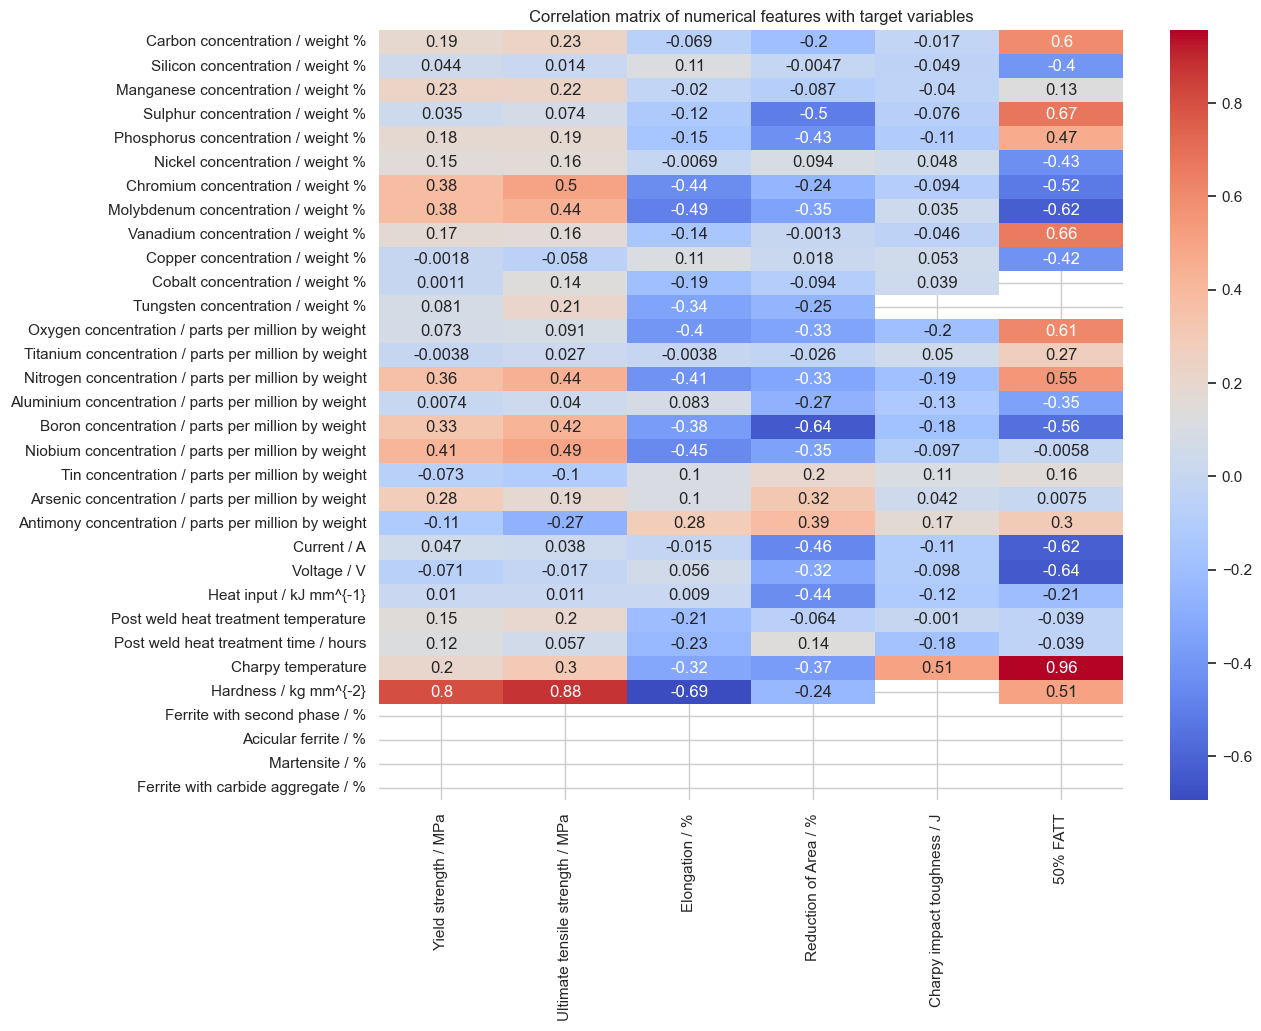

In [323]:
# Compute correlation matrix of scaled numerical features with target variables

X_and_Y_train = X_train_scaled.copy()
X_and_Y_train[target_variables] = Y_train_scaled.copy()

corr_matrix = X_and_Y_train[numerical_cols].corr()

# Show target_variables as columns and features as rows
corr_matrix = corr_matrix[target_variables].T.drop(target_variables, axis=1).T

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix of numerical features with target variables')
plt.show()


We notice that Charpy impact toughness (which could be good indicator of weld quality) is not correlated at all with any feature. This is probably due to the fact that Charpy tests are not all done at the same temperature, and Charpy impact toughness values can probably not be compared accurately when tests were done at different temperatures.

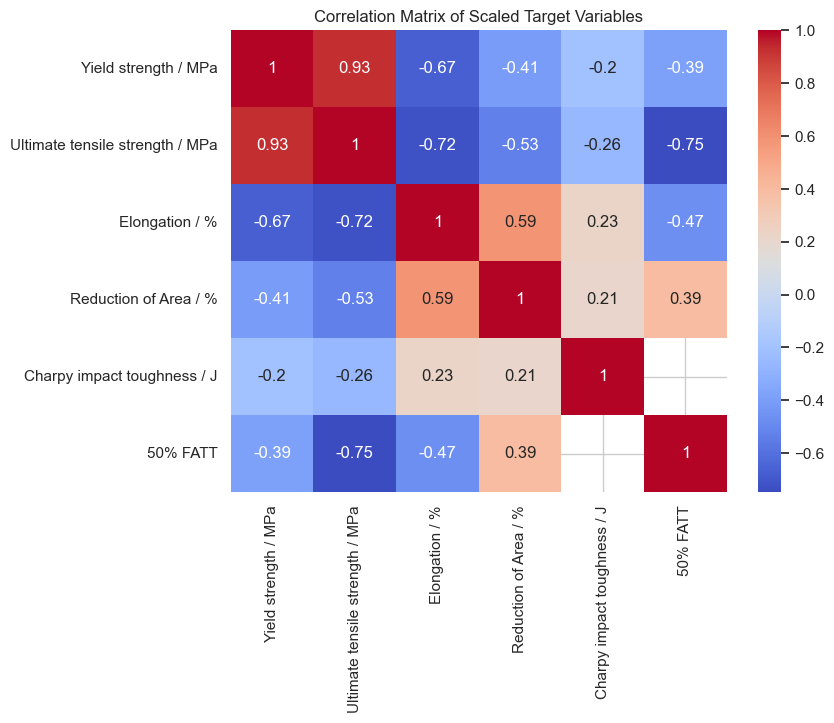

In [324]:
# Correlation of targets between each other
corr_matrix_targets = Y_train_scaled[target_variables].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_targets, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Scaled Target Variables')
plt.show()

In [325]:
# Count missing values per column
missing_values = X_train_scaled.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Carbon concentration / weight %                             0
Silicon concentration / weight %                            0
Manganese concentration / weight %                          0
Sulphur concentration / weight %                            3
Phosphorus concentration / weight %                         8
Nickel concentration / weight %                           785
Chromium concentration / weight %                         717
Molybdenum concentration / weight %                       705
Vanadium concentration / weight %                         588
Copper concentration / weight %                           858
Cobalt concentration / weight %                          1188
Tungsten concentration / weight %                        1237
Oxygen concentration / parts per million by weight        309
Titanium concentration / parts per million by weight      540
Nitrogen concentration / parts per million by weight      368
Aluminium concentration / parts per million

In [326]:
# Decide on a threshold for acceptable missing data (e.g., drop columns with >50% missing)
threshold = 0.99 * len(X_train_scaled)

# Drop columns with too many missing values
columns_to_keep = missing_values[missing_values <= threshold].index

removed_columns = missing_values[missing_values > threshold].index
print("Columns removed due to missing values:", removed_columns)

X_train_scaled = X_train_scaled[columns_to_keep]
X_test_scaled = X_test_scaled[columns_to_keep]

numerical_cols_X = X_train_scaled.select_dtypes(include=['float64', 'int64',]).columns
categorical_cols_X = X_train_scaled.select_dtypes(include=['object']).columns

def impute_missing_values():
    global X_train_scaled, X_train_scaled_imputed, X_test_scaled, X_test_scaled_imputed

    X_train_scaled_imputed = X_train_scaled.copy()

    # Impute remaining missing values
    # For numerical columns, fill with median
    X_train_scaled_imputed[numerical_cols_X] = X_train_scaled[numerical_cols_X].fillna(X_train_scaled[numerical_cols_X].median())

    # For categorical columns, fill with mode
    X_train_scaled_imputed[categorical_cols_X] = X_train_scaled[categorical_cols_X].fillna(X_train_scaled[categorical_cols_X].mode().iloc[0])

    # Impute X_test_scaled in the same way
    X_test_scaled_imputed = X_test_scaled.copy()
    X_test_scaled_imputed[numerical_cols_X] = X_test_scaled[numerical_cols_X].fillna(X_train_scaled[numerical_cols_X].median())
    X_test_scaled_imputed[categorical_cols_X] = X_test_scaled[categorical_cols_X].fillna(X_train_scaled[categorical_cols_X].mode().iloc[0])

impute_missing_values()


Columns removed due to missing values: Index([], dtype='object')


In [327]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
import numpy as np
import pandas as pd

def impute_missing_values():
    global X_train_scaled, X_train_scaled_imputed, X_test_scaled, X_test_scaled_imputed, numerical_cols_X, categorical_cols_X

    # Decide on a threshold for acceptable missing data (e.g., drop columns with >50% missing)
    threshold = 0.5 * len(X_train_scaled)

    # Drop columns with too many missing values
    columns_to_keep = missing_values[missing_values <= threshold].index
    X_train_scaled = X_train_scaled[columns_to_keep]

    numerical_cols_X = numerical_cols_X.intersection(columns_to_keep)

    X_train_scaled_imputed = X_train_scaled.copy()
    
    # Impute remaining missing values with MICE
    imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=0)
    X_train_scaled_imputed[numerical_cols_X] = imputer.fit_transform(X_train_scaled[numerical_cols_X])
    X_train_scaled_imputed[categorical_cols_X] = X_train_scaled[categorical_cols_X]

    # Impute X_test_scaled in the same way
    X_test_scaled = X_test_scaled[columns_to_keep]
    X_test_scaled_imputed = X_test_scaled.copy()
    X_test_scaled_imputed[numerical_cols_X] = imputer.transform(X_test_scaled[numerical_cols_X])
    X_test_scaled_imputed[categorical_cols_X] = X_test_scaled[categorical_cols_X]

# impute_missing_values()


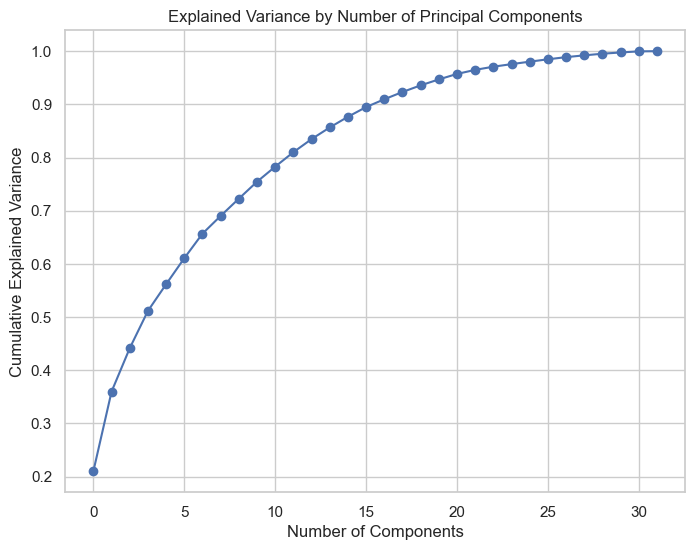

In [328]:
# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(X_train_scaled_imputed[numerical_cols_X])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

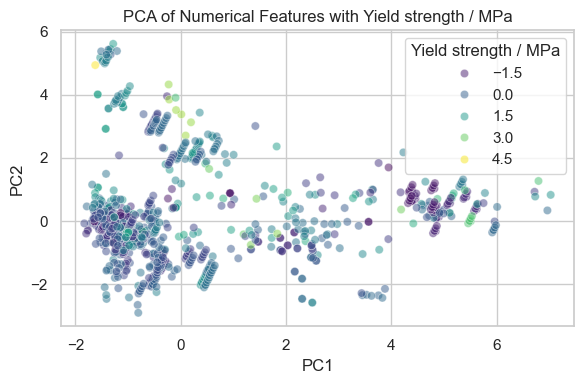

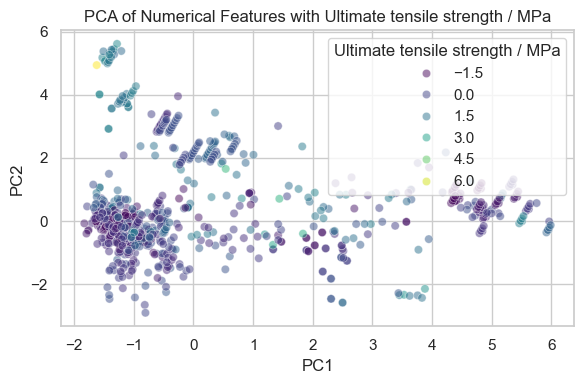

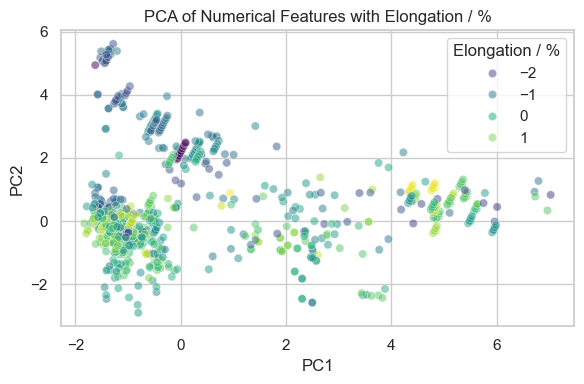

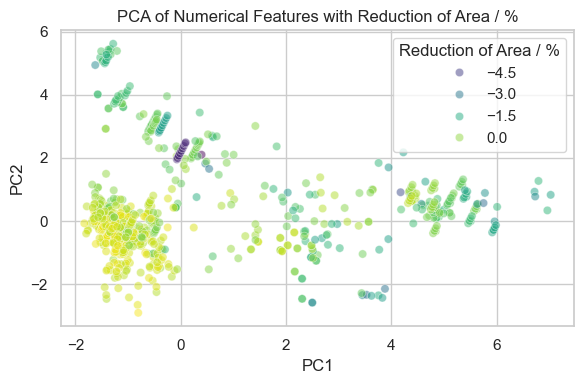

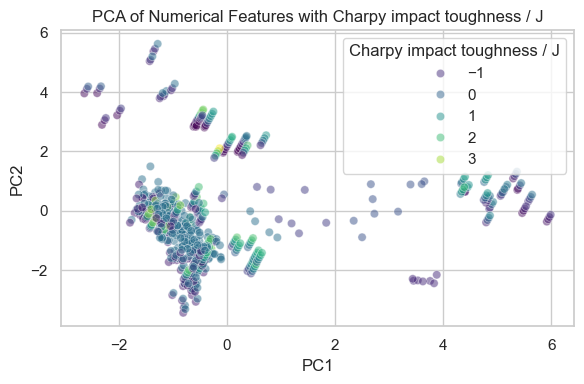

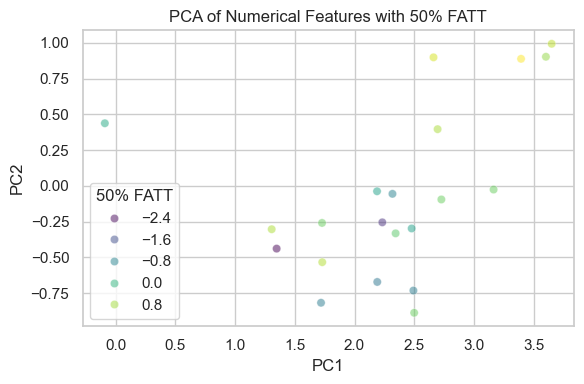

In [329]:
# Choose the number of components that explain a sufficient amount of variance
n_components = 2  # Adjust based on the cumulative explained variance

# Apply PCA with n_components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_train_scaled_imputed[numerical_cols_X])

# Create a DataFrame with principal components
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# If a target variable exists, include it for visualization
# Assuming 'Charpy impact toughness / J' is the target variable
for target in target_variables:
    df_pca[target] = Y_train_scaled[target].values

    # Plot the first two principal components colored by the target variable
    fig, axes = plt.subplots(1, 1, figsize=(6, 4))
    sns.scatterplot(
        x='PC1', y='PC2',
        hue=target,
        palette='viridis',
        data=df_pca,
        legend='brief',
        alpha=0.5,
    )
    plt.title(f'PCA of Numerical Features with {target}')
    plt.tight_layout()
    plt.show()


## **Part 3: Applying Machine Learning Approaches to Predict Weld Quality**

### **Overview**

In this section, we will apply various machine learning (ML) models to predict the quality of welds based on the preprocessed data. Given that the dataset is partially labeled (each target column is approximately half-filled and almost no row has all targets), we will:

1. **Focus on a Single Target Variable**: Due to the high number of missing values across multiple targets, we'll start by selecting the target variable with the most available data.
2. **Apply Supervised Learning Models**: Implement standard regression models.
3. **Implement Semi-Supervised Learning**: Utilize self-training techniques to leverage unlabeled data.
4. **Perform Rigorous Cross-Validation**: Ensure robust evaluation of model performance.
5. **Compare Model Performances**: Analyze and compare the effectiveness of different models using appropriate metrics.

---

### **Step 1: Selecting the Target Variable**

We'll choose **"Charpy impact toughness / J"** as our target variable since it has the most available data among the potential targets.

In [364]:
# Define the target variable
# Targets are ['Yield strength / MPa', 'Ultimate tensile strength / MPa', 'Elongation / %', 'Reduction of Area / %', 'Charpy impact toughness / J', '50% FATT']
target = target_variables[0]

# Y_train is a matrix with all target variables, y_train is a vector with a unique target variable
y_train = Y_train_scaled[target]
y_test = Y_test_scaled[target]

# Check the number of non-missing values for the target
non_missing_target = y_train.notnull().sum()
print(f"Number of non-missing values for '{target}': {non_missing_target} out of {len(df)}")

Number of non-missing values for 'Yield strength / MPa': 992 out of 1652


In [365]:
# Separate labeled and unlabeled data
labeled_mask = y_train.notnull()

print("Shape of X_train_scaled_imputed:", X_train_scaled_imputed.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of labeled_mask:", labeled_mask.shape)

X_train_labeled = X_train_scaled_imputed[labeled_mask]
y_train_labeled = y_train[labeled_mask]

X_train_unlabeled = X_train_scaled_imputed[~labeled_mask]

print("Labeled training set shape:", X_train_labeled.shape)
print("Unlabeled training set shape:", X_train_unlabeled.shape)

labeled_mask_test = y_test.notnull()
X_test_labeled = X_test_scaled_imputed[labeled_mask_test]
y_test_labeled = y_test[labeled_mask_test]

print("Labeled test set shape:", X_test_labeled.shape)
print("Unlabeled test set shape:", X_test_scaled_imputed.shape)


Shape of X_train_scaled_imputed: (1294, 39)
Shape of y_train: (1294,)
Shape of labeled_mask: (1294,)
Labeled training set shape: (992, 39)
Unlabeled training set shape: (302, 39)
Labeled test set shape: (277, 39)
Unlabeled test set shape: (358, 39)


In [366]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()  # Adjust based on explained variance

# Fit PCA on labeled training data and transform
X_train_labeled_pca = pca.fit_transform(X_train_labeled[numerical_cols_X])

# Transform the unlabeled training data
X_train_unlabeled_pca = pca.transform(X_train_unlabeled[numerical_cols_X])

# Transform the test data
X_test_labeled_pca = pca.transform(X_test_labeled[numerical_cols_X])

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by the first {len(explained_variance)} principal components: {explained_variance}")


Explained variance by the first 32 principal components: [2.48576433e-01 1.31994414e-01 7.27873980e-02 7.03102456e-02
 5.42666685e-02 5.10425949e-02 4.31867525e-02 3.95384108e-02
 3.53730582e-02 3.21858220e-02 2.89102029e-02 2.52387837e-02
 2.36517075e-02 2.05204600e-02 1.80964410e-02 1.74247785e-02
 1.42846991e-02 1.30927252e-02 1.23754960e-02 1.06213670e-02
 8.46088324e-03 6.74605213e-03 5.04153809e-03 4.99887557e-03
 4.54348855e-03 2.82957733e-03 2.71534323e-03 1.18578429e-03
 1.40686594e-17 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [367]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
import numpy as np

# Add Dummy models for Mean and Median predictions
basic_models = {
    'Mean Model': DummyRegressor(strategy='mean'),
    'Median Model': DummyRegressor(strategy='median')
}

# Initialize your advanced models including XGBoost
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Machine': SVR(kernel='linear'),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

# Merge basic and advanced models into one dictionary
all_models = {**basic_models, **models}

# Dictionary to store cross-validation results
cv_results = {}

print("Predicting:", target + "\n")

# Perform 5-fold cross-validation for each model
for name, model in all_models.items():
    # Negative MSE for scoring; higher is better, so we take negative
    neg_mse = cross_val_score(model, X_train_labeled_pca, y_train_labeled, 
                              cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-neg_mse)
    cv_results[name] = rmse
    print(f"{name} - RMSE: {rmse.mean():.2f} ± {rmse.std():.2f}")

    # RMSE with X_test_labeled and y_test_labeled
    model.fit(X_train_labeled_pca, y_train_labeled)
    y_pred = model.predict(X_test_labeled_pca)
    rmse_test = np.sqrt(mean_squared_error(y_test_labeled, y_pred))
    print(f"{name} - RMSE on test set: {rmse_test:.2f}")
    print()

X_current = X_train_labeled_pca
Y_current = y_train_labeled


Predicting: Yield strength / MPa

Mean Model - RMSE: 1.00 ± 0.06
Mean Model - RMSE on test set: 0.85

Median Model - RMSE: 1.00 ± 0.07
Median Model - RMSE on test set: 0.87

Linear Regression - RMSE: 0.74 ± 0.09
Linear Regression - RMSE on test set: 2.03

Random Forest - RMSE: 0.61 ± 0.08
Random Forest - RMSE on test set: 0.52

Gradient Boosting - RMSE: 0.56 ± 0.10
Gradient Boosting - RMSE on test set: 0.52

Support Vector Machine - RMSE: 0.80 ± 0.09
Support Vector Machine - RMSE on test set: 1.65

XGBoost - RMSE: 0.58 ± 0.09
XGBoost - RMSE on test set: 0.58



In [368]:
# Use self-training to fill in missing values in the unlabeled set

from sklearn.base import clone

# Define the base estimator
base_estimator = RandomForestRegressor(n_estimators=100, random_state=42)

# Number of self-training iterations
n_iterations = 15

# Confidence threshold for adding pseudo-labels
confidence_threshold = 0.70

# Initialize labeled and unlabeled datasets
X_current = X_train_labeled_pca
Y_current = y_train_labeled.copy()

X_unlabeled_current = X_train_unlabeled_pca
y_unlabeled_current = np.full(shape=(X_unlabeled_current.shape[0],), fill_value=np.nan)

for iteration in range(n_iterations):
    print(f"Self-Training Iteration {iteration + 1}")
    
    # Clone the base estimator to ensure fresh models each iteration
    model = clone(base_estimator)
    
    # Fit the model on the current labeled data
    model.fit(X_current, Y_current)
    
    # Predict on the unlabeled data
    y_unlabeled_pred = model.predict(X_unlabeled_current)
    
    # Calculate prediction confidence (e.g., inverse of prediction variance)
    # For Random Forest, use the standard deviation of predictions from all trees
    all_tree_preds = np.array([tree.predict(X_unlabeled_current) for tree in model.estimators_])
    pred_std = all_tree_preds.std(axis=0)
    confidence = 1 / (1 + pred_std)  # Higher confidence for lower std

    print(f"Mean confidence: {confidence.mean():.2f}")

    # Select samples with confidence above the threshold
    high_confidence_mask = confidence >= confidence_threshold
    n_high_confidence = high_confidence_mask.sum()
    
    print(f"High confidence predictions to add: {n_high_confidence}")
    
    if n_high_confidence == 0:
        print("No high-confidence predictions available. Stopping self-training.")
        break
    
    # Add high-confidence pseudo-labeled data to the labeled set
    X_pseudo = X_unlabeled_current[high_confidence_mask]
    y_pseudo = y_unlabeled_pred[high_confidence_mask]
    
    X_current = np.vstack((X_current, X_pseudo))
    Y_current = np.concatenate((Y_current, y_pseudo))
    
    # Remove the pseudo-labeled samples from the unlabeled set
    X_unlabeled_current = X_unlabeled_current[~high_confidence_mask]
    print(f"Remaining unlabeled samples: {X_unlabeled_current.shape[0]}\n")


Self-Training Iteration 1
Mean confidence: 0.58
High confidence predictions to add: 34
Remaining unlabeled samples: 268

Self-Training Iteration 2
Mean confidence: 0.58
High confidence predictions to add: 35
Remaining unlabeled samples: 233

Self-Training Iteration 3
Mean confidence: 0.57
High confidence predictions to add: 31
Remaining unlabeled samples: 202

Self-Training Iteration 4
Mean confidence: 0.55
High confidence predictions to add: 16
Remaining unlabeled samples: 186

Self-Training Iteration 5
Mean confidence: 0.54
High confidence predictions to add: 9
Remaining unlabeled samples: 177

Self-Training Iteration 6
Mean confidence: 0.54
High confidence predictions to add: 1
Remaining unlabeled samples: 176

Self-Training Iteration 7
Mean confidence: 0.53
High confidence predictions to add: 0
No high-confidence predictions available. Stopping self-training.


Self-Training XGBoost - RMSE: 0.61 ± 0.06
Self-Training XGBoost - RMSE on test set: 0.51


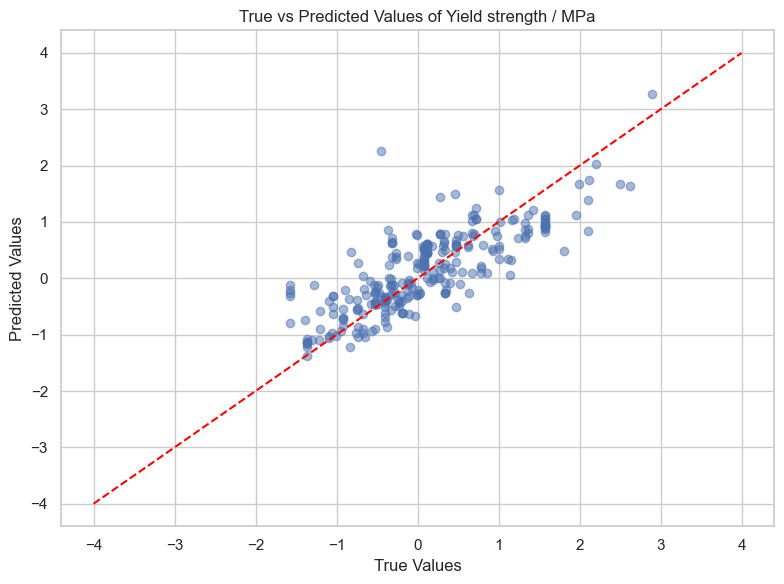

In [369]:
# Initialize the model
model_name = 'XGBoost'
semi_supervised_model = models[model_name]

# Fit the model on the expanded labeled dataset
semi_supervised_model.fit(X_current, Y_current)

# Perform cross-validation
neg_mse_ss = cross_val_score(semi_supervised_model, X_current, Y_current, 
                             cv=5, scoring='neg_mean_squared_error')
rmse_ss = np.sqrt(-neg_mse_ss)
cv_results[f'Self-Training {model_name}'] = rmse_ss

print(f"Self-Training {model_name} - RMSE: {rmse_ss.mean():.2f} ± {rmse_ss.std():.2f}")

# RMSE with X_test_labeled and y_test_labeled
y_pred = semi_supervised_model.predict(X_test_labeled_pca)
rmse_test = np.sqrt(mean_squared_error(y_test_labeled, y_pred))
print(f"Self-Training {model_name} - RMSE on test set: {rmse_test:.2f}")

# Plot the predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test_labeled, y_pred, alpha=0.5)
plt.plot([-4, 4], [-4, 4], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values of ' + target)
plt.grid(True)
plt.tight_layout()
plt.show()